In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import warnings
from collections import Counter
import matplotlib.colors
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv('hotel_clean_meanNAN.csv')
del df['Unnamed: 0']
print(df.shape)
df

(2447, 7)


,hotelname,rating,reviews,star rating,location,price,tax
0,Grande Collection Hotel & Spa,5.0,322.0,4.0,Old Quarter,41,10
1,Diamond Legend Hotel,4.5,1142.0,3.0,Old Quarter,20,5
2,Lotte Hotel Hanoi,5.0,2469.0,5.0,Ba Dinh,93,28
3,Silk Path Hotel Hanoi,4.5,4361.0,4.0,Old Quarter,59,13
4,Lotte Hotel Hanoi,5.0,2469.0,5.0,Ba Dinh,94,28
...,...,...,...,...,...,...,...
2442,K53 Hotel,4.5,520.0,3.0,District 1,26,0
2443,WE HOME THAI VAN LUNG,4.5,520.0,4.0,District 1,29,0
2444,Silverland May Hotel,4.5,520.0,4.0,District 1,70,0
2445,Cozi 5 Hotel,4.5,520.0,2.0,Tân Phong,19,0


In [ ]:

df['tax']=df['tax'].astype(float)

df.info()

ValueError: could not convert string to float: 'for         '

In [ ]:
df

,hotelname,rating,reviews,star rating,location,price,tax
0,Grande Collection Hotel & Spa,5.0,322.0,4.0,Old Quarter,41,10
1,Diamond Legend Hotel,4.5,1142.0,3.0,Old Quarter,20,5
2,Lotte Hotel Hanoi,5.0,2469.0,5.0,Ba Dinh,93,28
3,Silk Path Hotel Hanoi,4.5,4361.0,4.0,Old Quarter,59,13
4,Lotte Hotel Hanoi,5.0,2469.0,5.0,Ba Dinh,94,28
...,...,...,...,...,...,...,...
2442,K53 Hotel,4.5,520.0,3.0,District 1,26,0
2443,WE HOME THAI VAN LUNG,4.5,520.0,4.0,District 1,29,0
2444,Silverland May Hotel,4.5,520.0,4.0,District 1,70,0
2445,Cozi 5 Hotel,4.5,520.0,2.0,Tân Phong,19,0


# **0. Data overview**

In [ ]:
df.columns

Index(['hotelname', 'rating', 'reviews', 'star rating', 'location', 'price',
       'tax'],
      dtype='object')

In [ ]:
df.describe(include='all')

,hotelname,rating,reviews,star rating,location,price,tax
count,2447,2447.000000,2447.000000,2447.000000,2447,2447.000000,2447
unique,976,NaN,NaN,NaN,63,NaN,37
top,Hanoi Allure Hotel,NaN,NaN,NaN,Hoan Kiem (Old Quarter),NaN,0
freq,7,NaN,NaN,NaN,779,NaN,1969
mean,NaN,4.491827,529.211279,3.276257,NaN,49.604414,NaN
std,NaN,0.472609,771.013551,0.822628,NaN,43.028072,NaN
min,NaN,1.500000,5.000000,1.000000,NaN,7.000000,NaN
25%,NaN,4.500000,81.000000,3.000000,NaN,27.000000,NaN
50%,NaN,4.500000,446.000000,3.000000,NaN,40.000000,NaN
75%,NaN,5.000000,520.000000,4.000000,NaN,58.000000,NaN


Summary about hotel information

# **1. Hotels listing count analysis**

## 1.1 Vehicle listings for different location






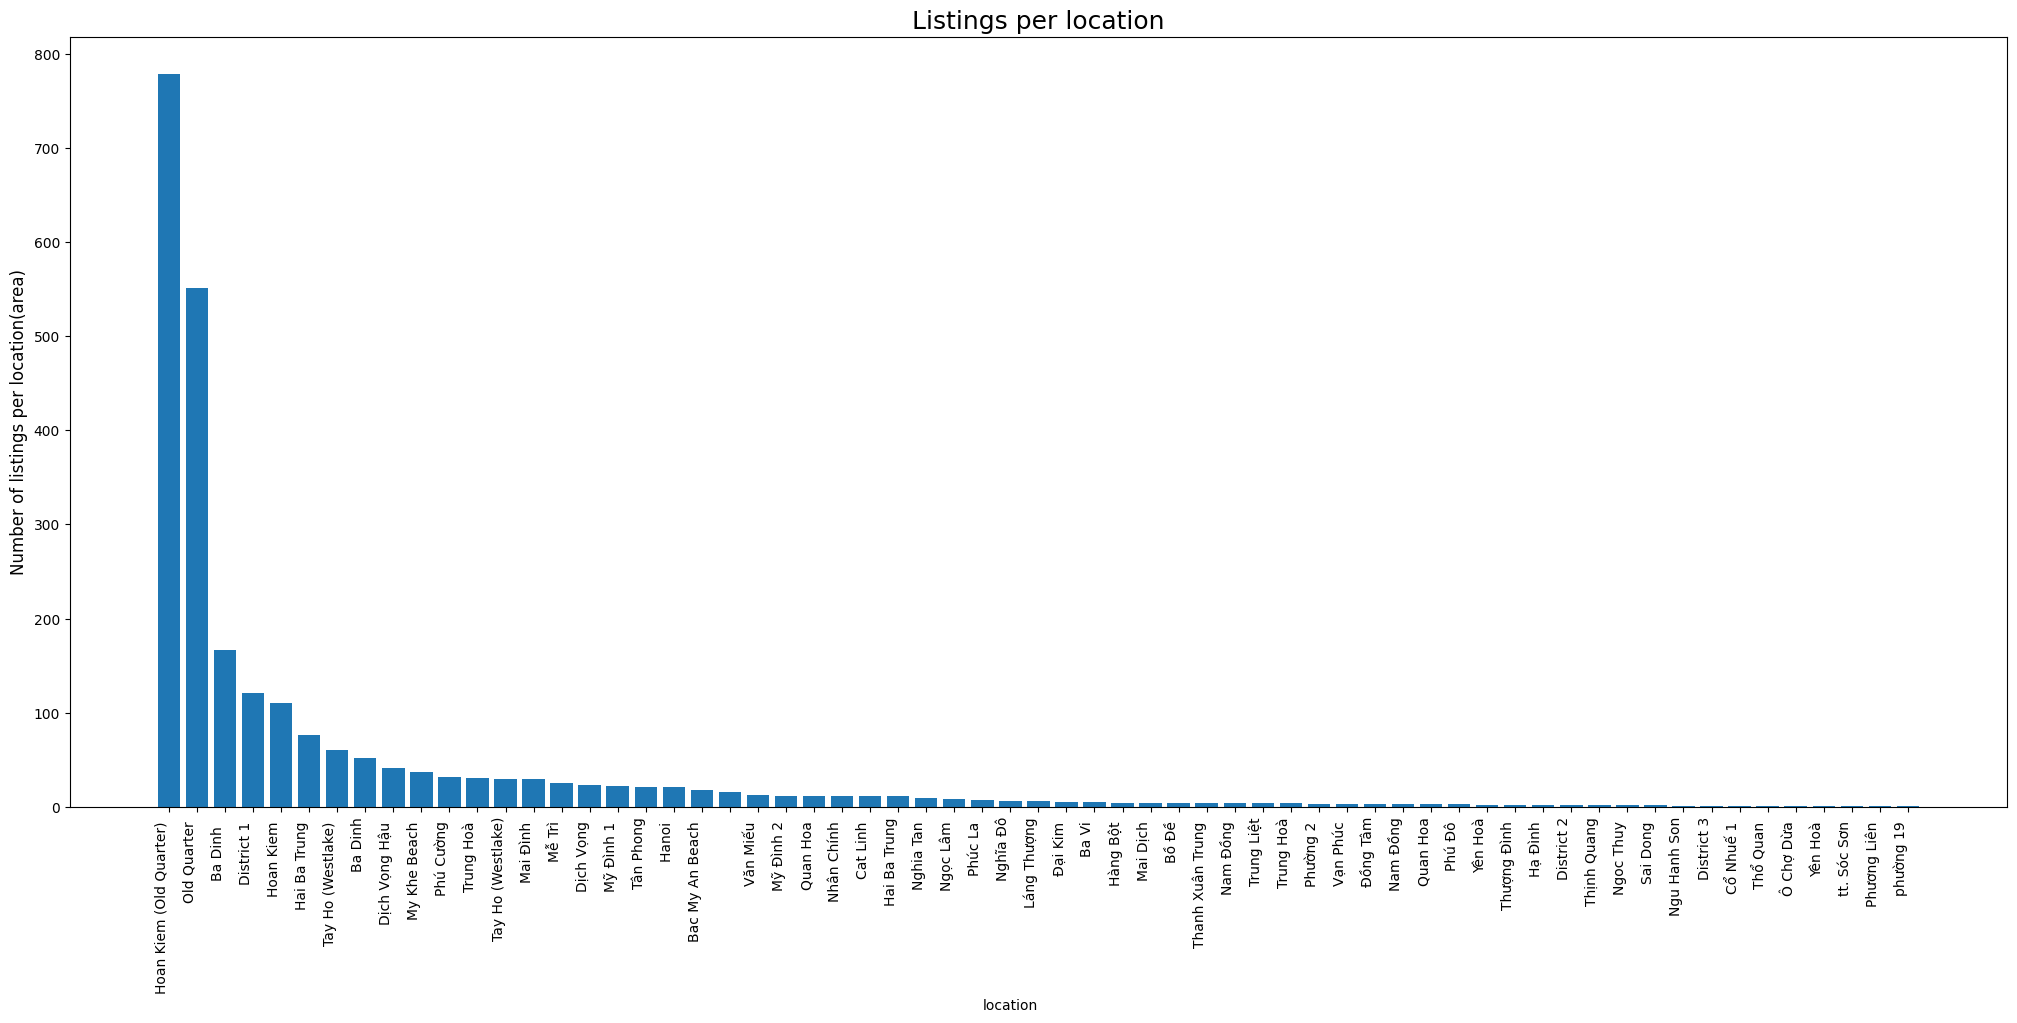

In [ ]:
value_counts = df['location'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per location(area)', fontsize=12)
plt.xlabel('location', rotation=0, ha='right')
plt.title('Listings per location', fontsize=18)
plt.xticks(rotation=90, ha='right')
plt.show()

## 1.2 Rating(user rating) distribution




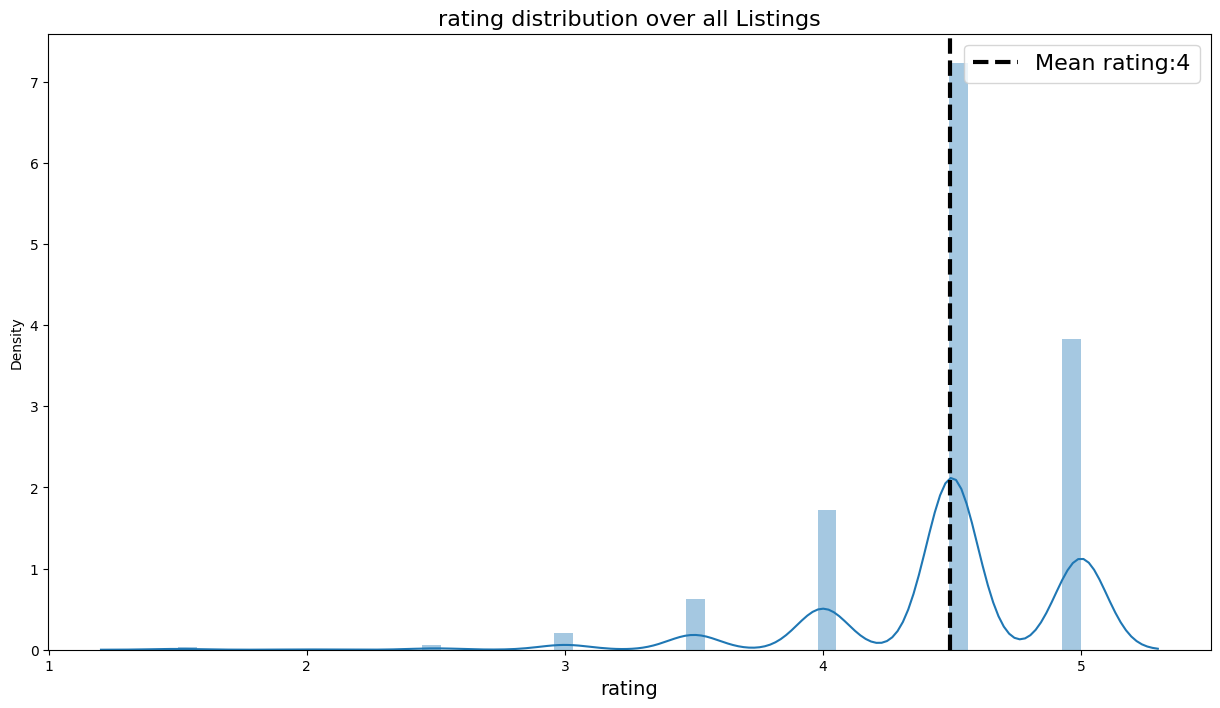

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.rating,kde=True)
plt.xlabel('rating',fontsize=14)
plt.axvline(df['rating'].mean(),lw=3,ls='dashed',
            color='black',label='Mean rating:'+'{0:.0f}'.format(np.mean(df.rating)))
plt.title('rating distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

## 1.3 Price distribution

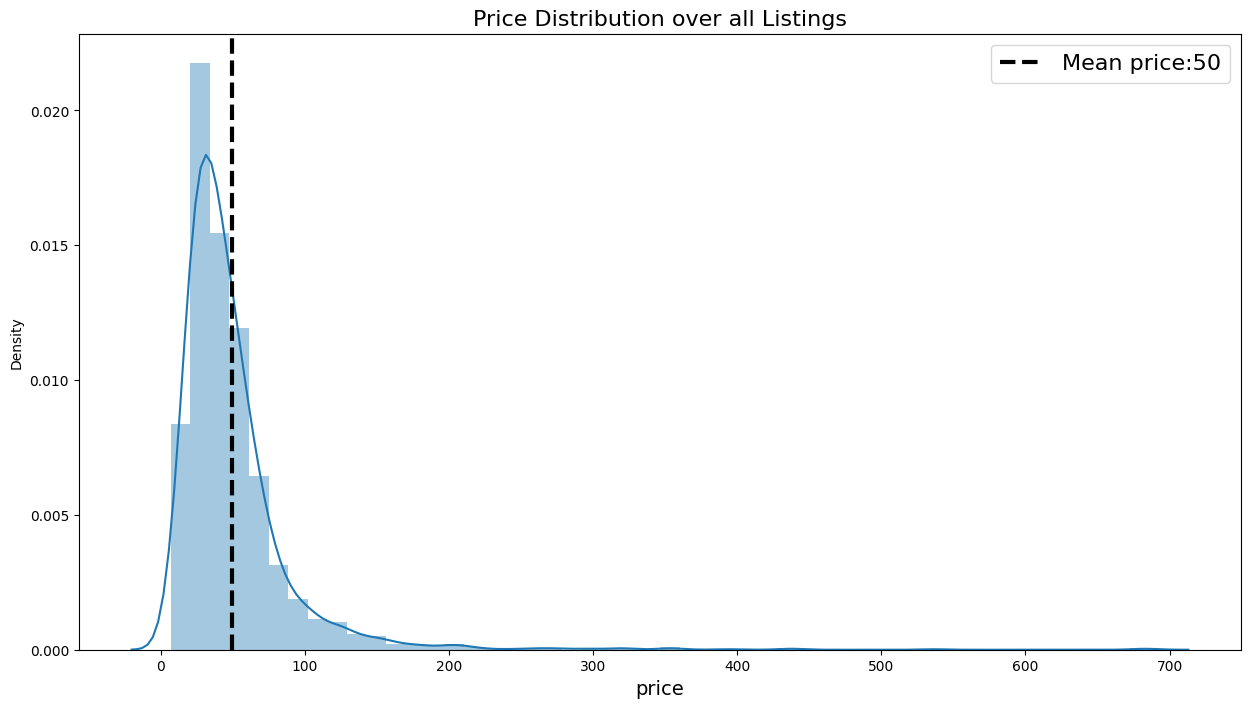

In [ ]:
# look at miles overall distribution
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.price,kde=True)
plt.xlabel('price',fontsize=14)
plt.axvline(df.price.mean(),lw=3,ls='dashed',
            color='black',label='Mean price:'+'{0:.0f}'.format(np.mean(df.price)))
plt.title('Price Distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

## 1.4 Reviews distribution



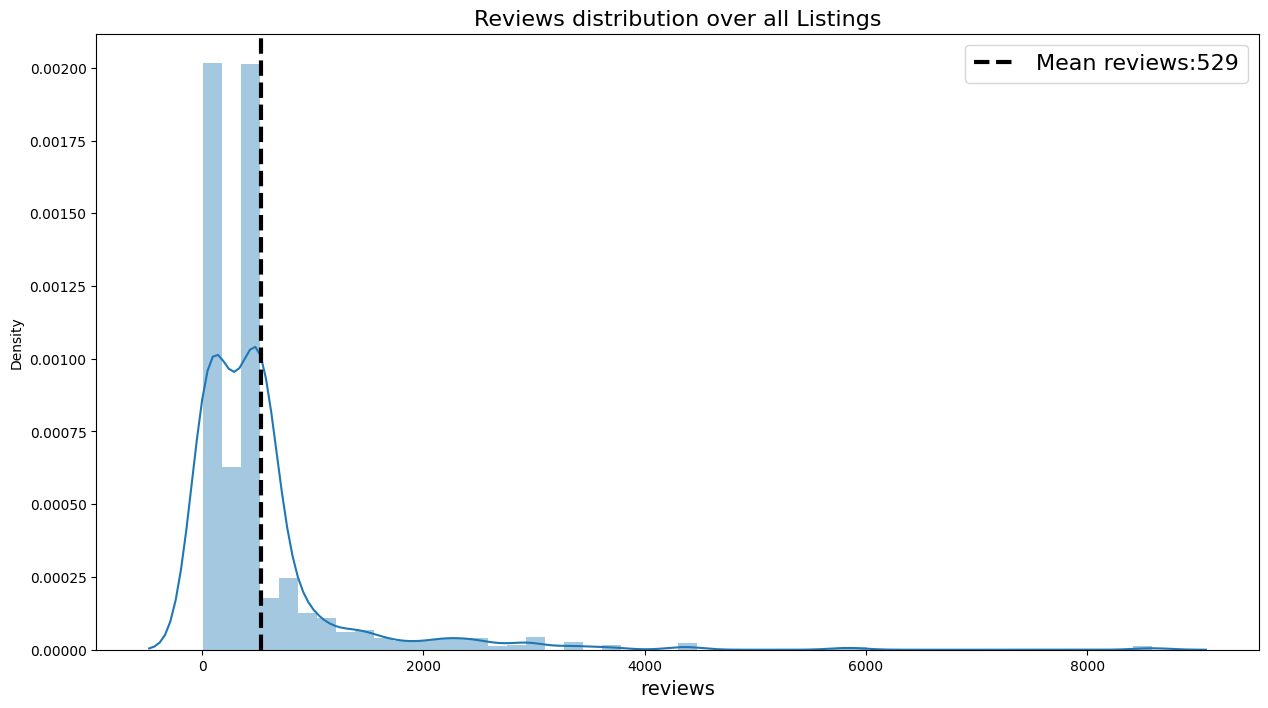

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.reviews,kde=True)
plt.xlabel('reviews',fontsize=14)
plt.axvline(df['reviews'].mean(),lw=3,ls='dashed',
            color='black',label='Mean reviews:'+'{0:.0f}'.format(np.mean(df.reviews)))
plt.title('Reviews distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

## 1.5 Star rating distribution

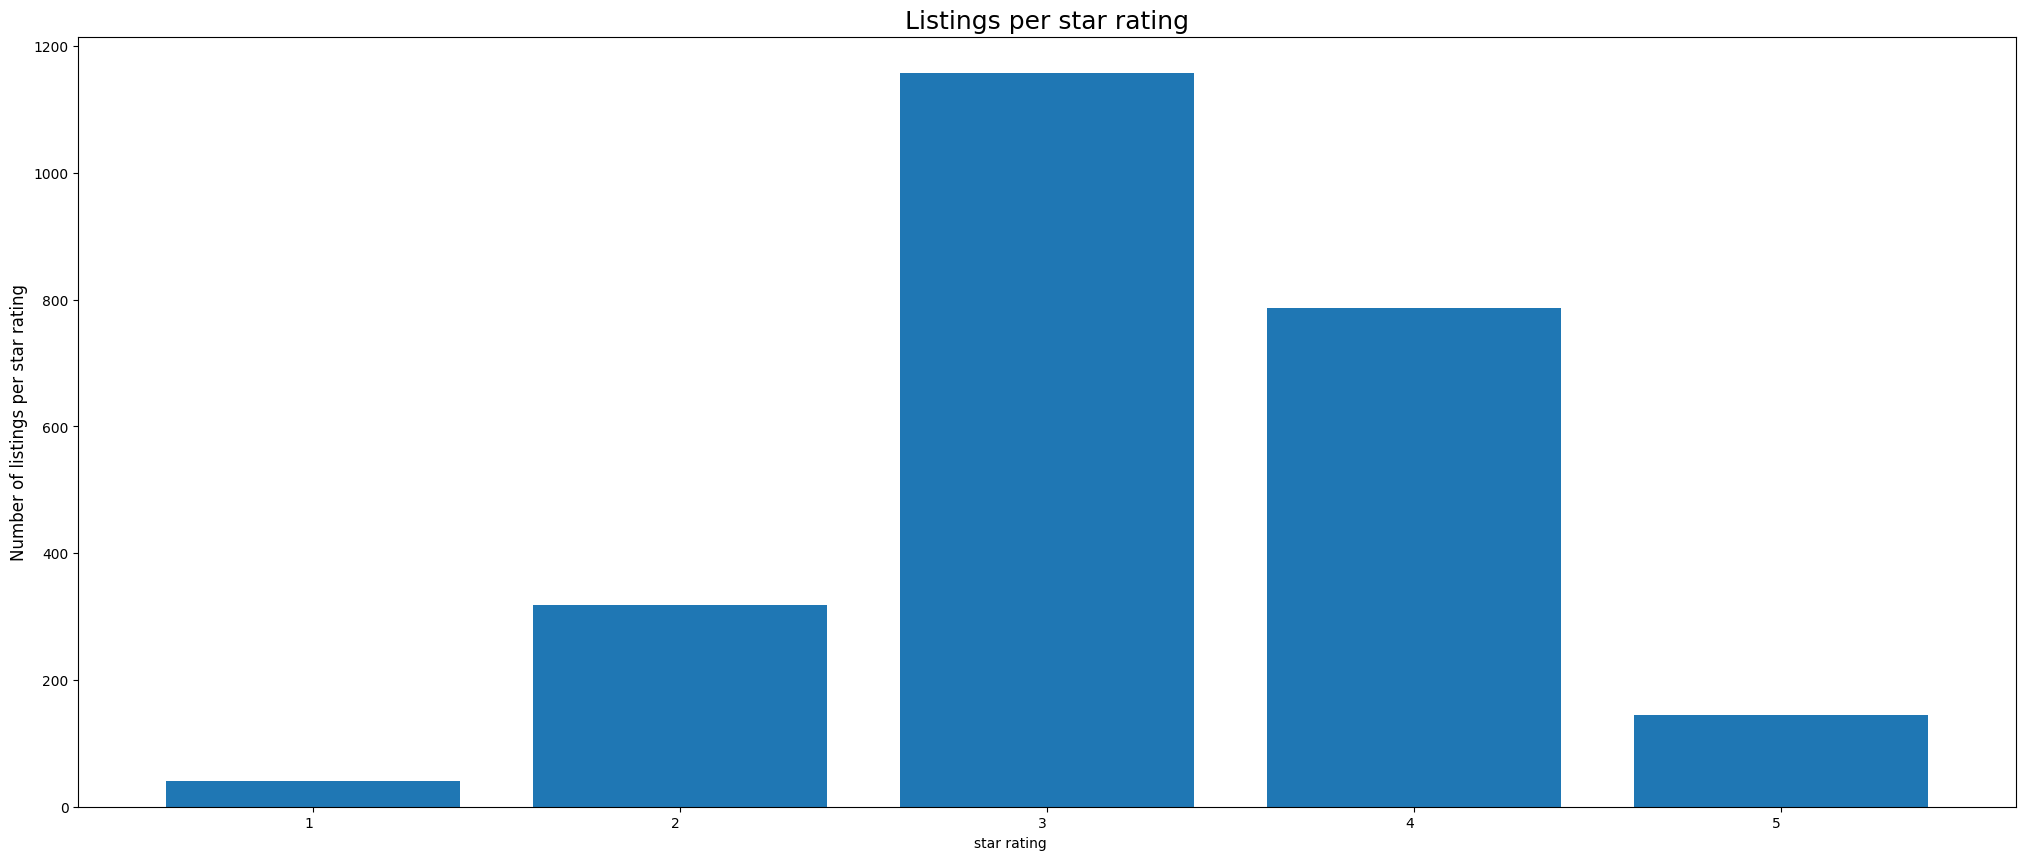

In [ ]:
value_counts = df['star rating'].value_counts()

labels = value_counts.index
counts = value_counts.values

plt.figure(figsize=(25, 10))

plt.bar(labels, counts)
plt.ylabel('Number of listings per star rating', fontsize=12)
plt.xlabel('star rating', rotation=0, ha='right')
plt.title('Listings per star rating', fontsize=18)
plt.xticks(rotation=0, ha='right')
plt.show()

## 1.6 Tax distribution

ValueError: could not convert string to float: 'for         '

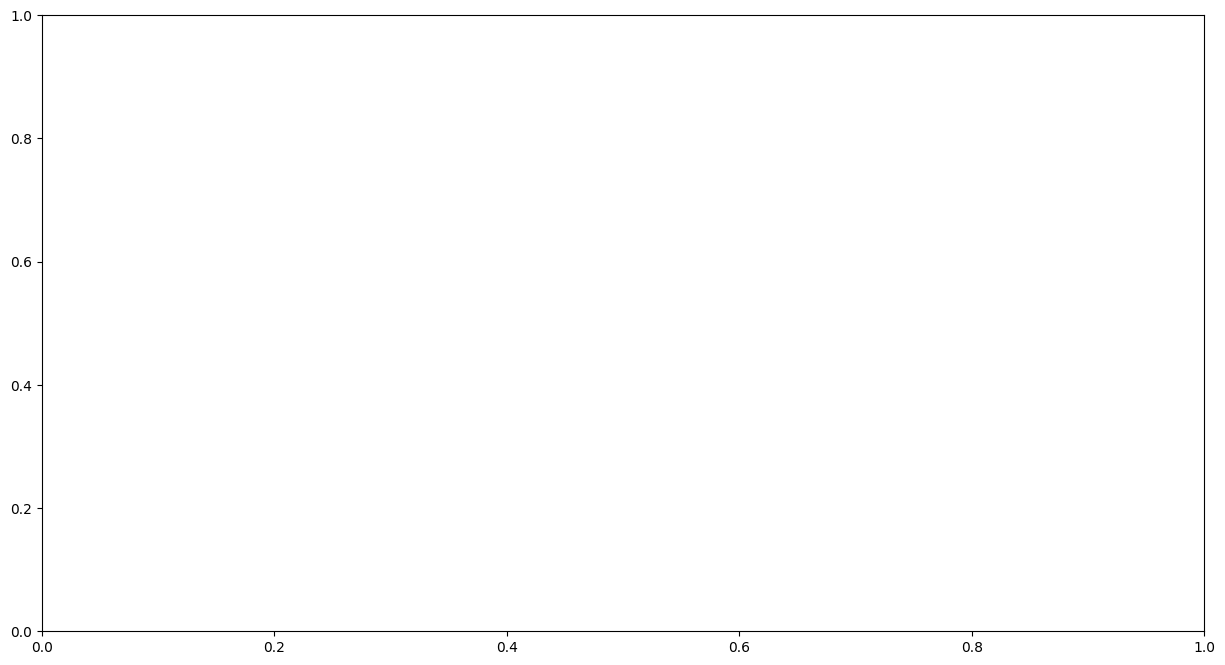

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.distplot(df.tax,kde=True)
plt.xlabel('tax',fontsize=14)
plt.axvline(df.tax.mean(),lw=3,ls='dashed',
            color='black',label='Mean tax:'+'{0:.0f}'.format(np.mean(df.tax)))
plt.title('Tax distribution over all Listings',fontsize=16)
plt.legend(loc='upper right',fontsize=16)
plt.show()

# **2. How price is related to other variables**


## 2.1 How the rating affect the price?

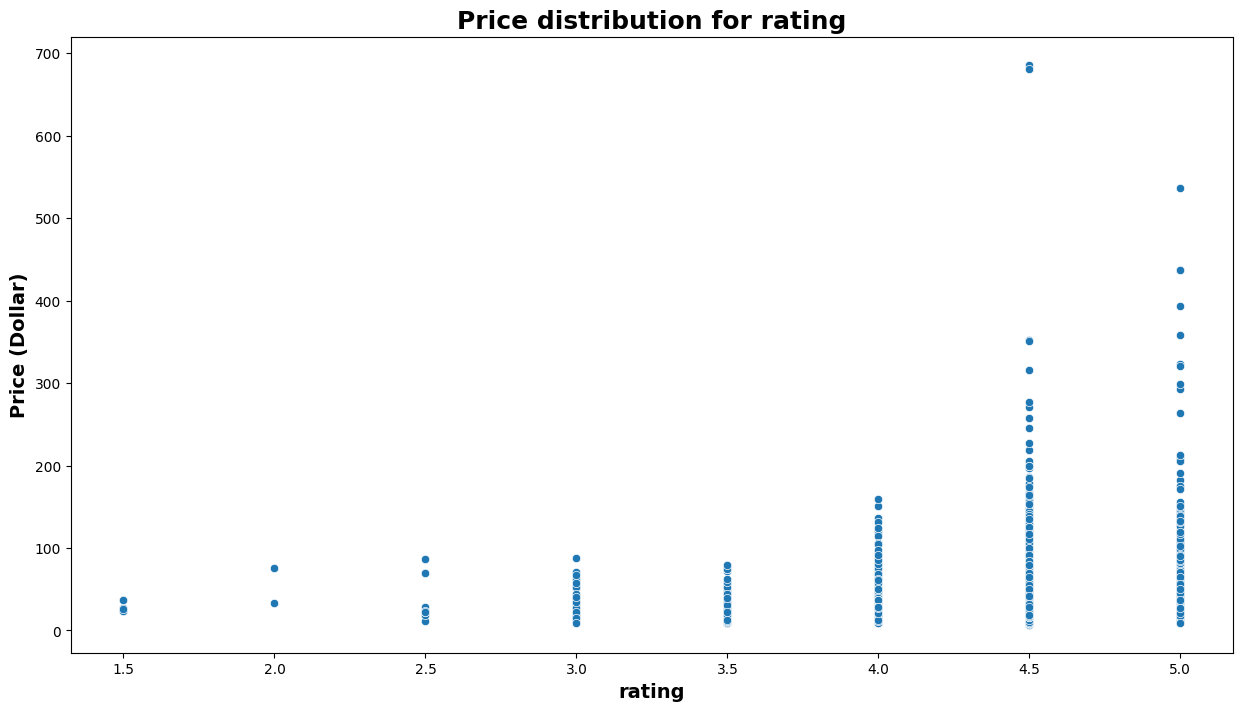

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='rating',y='price',data=df)
plt.ylabel('Price (Dollar)',fontsize=14,fontweight="bold")
plt.xlabel('rating',fontsize=14,fontweight="bold")
plt.title('Price distribution for rating',fontsize=18,fontweight="bold")
plt.show()

## 2.2 How the reviews affect the price?

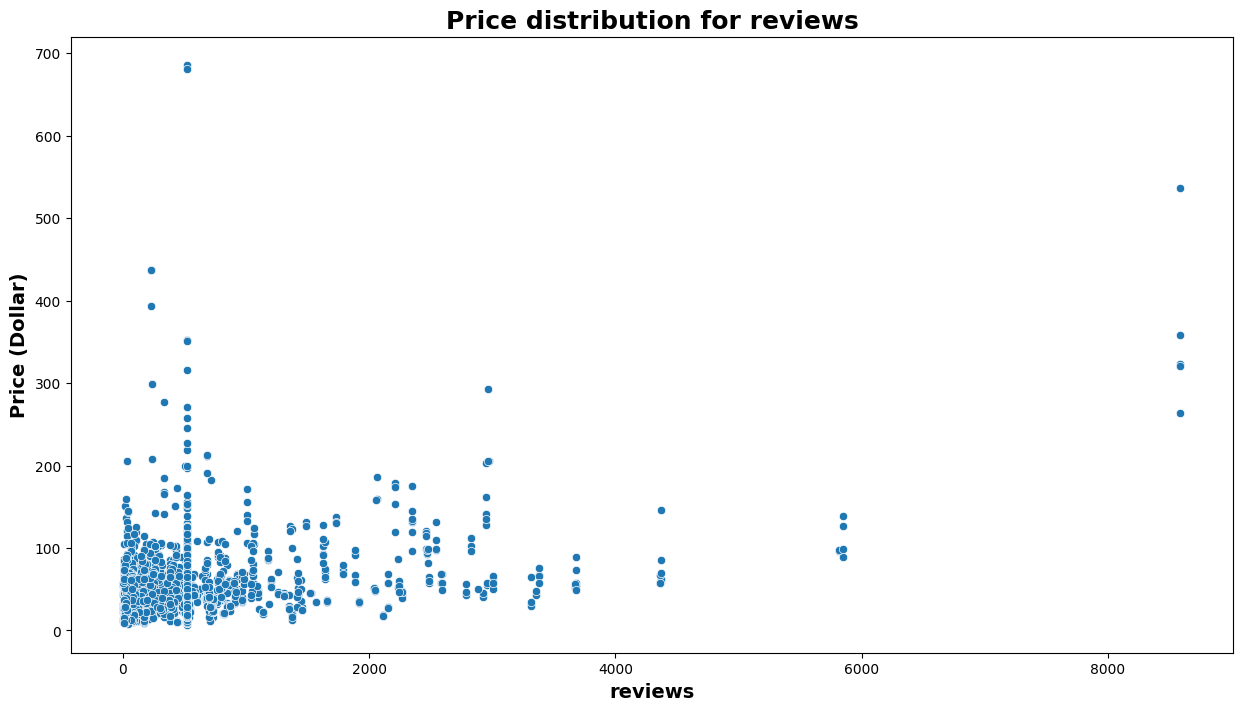

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='reviews',y='price',data=df)
plt.ylabel('Price (Dollar)',fontsize=14,fontweight="bold")
plt.xlabel('reviews',fontsize=14,fontweight="bold")
plt.title('Price distribution for reviews',fontsize=18,fontweight="bold")
plt.show()

## 2.3 How the star rating affect the price?

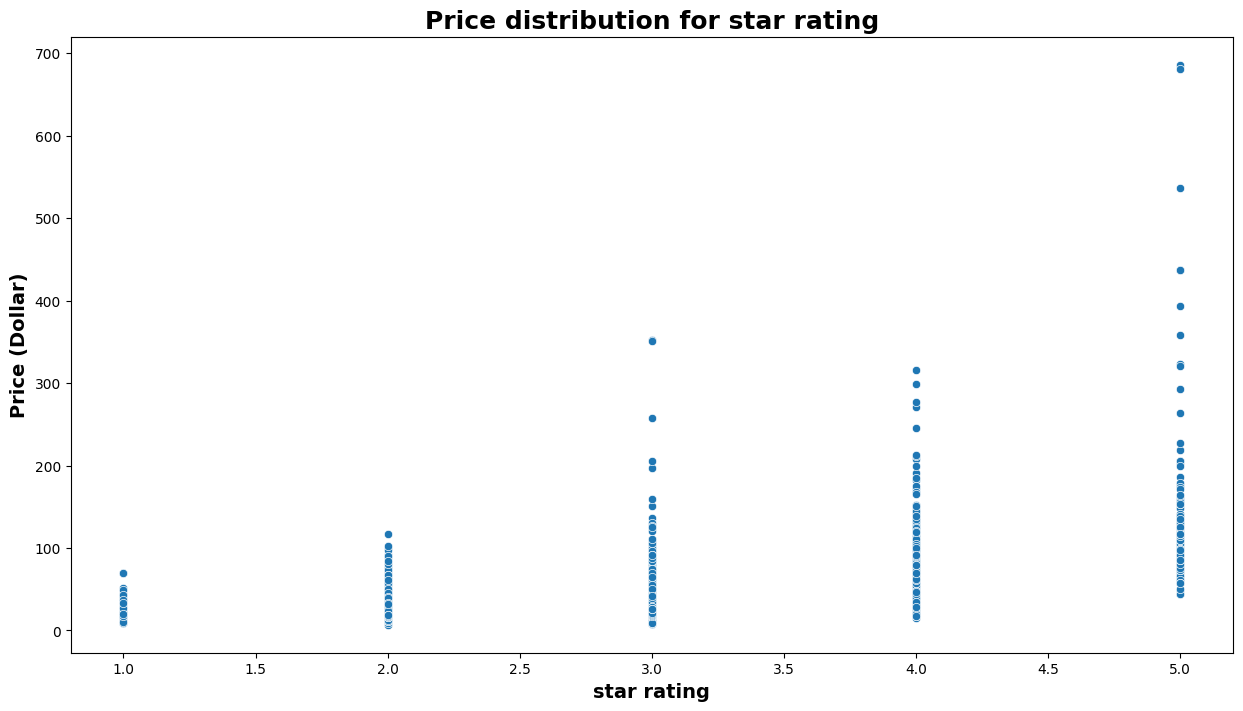

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='star rating',y='price',data=df)
plt.ylabel('Price (Dollar)',fontsize=14,fontweight="bold")
plt.xlabel('star rating',fontsize=14,fontweight="bold")
plt.title('Price distribution for star rating',fontsize=18,fontweight="bold")
plt.show()

## 2.4 How the tax affect the price?

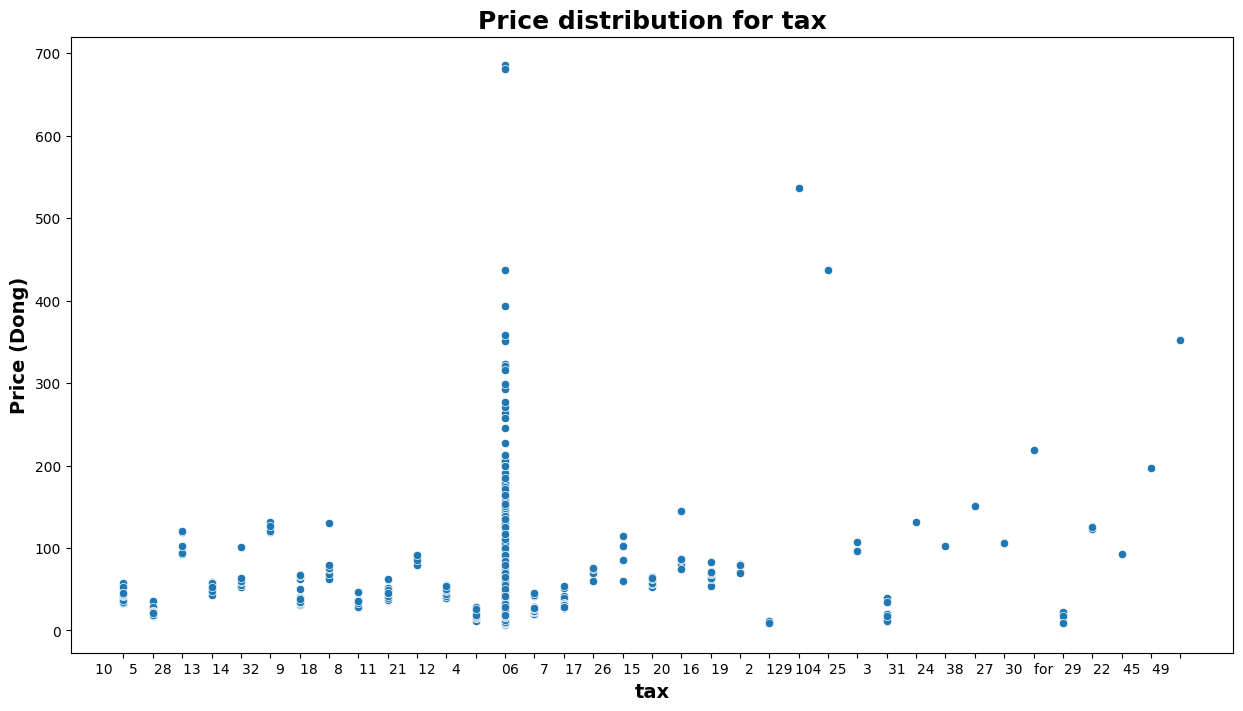

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='tax',y='price',data=df)
plt.ylabel('Price (Dollar)',fontsize=14,fontweight="bold")
plt.xlabel('tax',fontsize=14,fontweight="bold")
plt.title('Price distribution for tax',fontsize=18,fontweight="bold")
plt.show()

## 2.5 How the location affect the price?

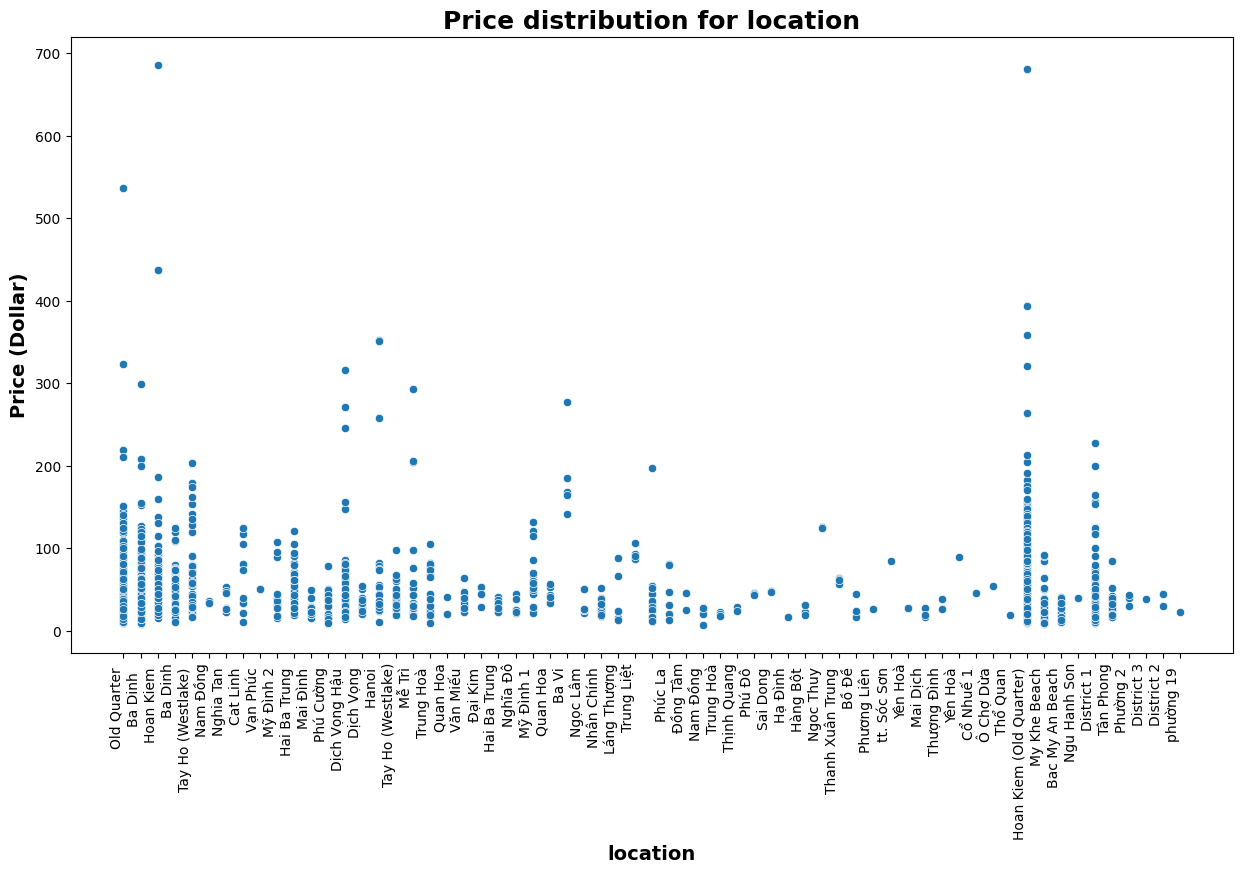

In [ ]:
fig = plt.figure(figsize=(15,8))
ax = fig.gca()
sns.scatterplot(x='location',y='price',data=df)
plt.ylabel('Price (Dollar)',fontsize=14,fontweight="bold")
plt.xlabel('location',fontsize=14,fontweight="bold")
plt.title('Price distribution for location',fontsize=18,fontweight="bold")
plt.xticks(rotation=90, ha='right')
plt.show()